### DSCI 100 Final Report 
#### Group 19
- Ann Peng
- Aretas Katabaro
- Edrick Philbertio
- Jessie Zhao

# Predicting STEM Company Based On Worker's Expectation

## Introduction

Data science and STEM careers are growing in popularity as more businesses leverage technological advances to solve challenges and streamline operations. Among them, students who are waiting for employment or employees who want to change careers are very curious about what can be the mean factors that impact the trajectory of salaries and bonuses among the top 5 companies counts from our data. The purpose of the experiment was to determine which combination of predictors out of seven predictors "years at work," "gender," "total yearly compensation," "race," "education,", and "year" most accurately predicted a person's career in STEM and data science in order to provide application suggestions for job seekers with different work experience and salary expectations. This is to suggest that the job seekers can be more insightful and intentional with their development and career path. The dataset we will be working with is the "Data Science and STEM Salary" dataset from Kaggle, which contains information on numerous job titles and other criteria, and has 62,000 salary records from the leading organizations for this project. 

### Method & Result

Year, work experience, gender, total yearly compensation, race, and education are the quantitative variables that we have used to predict the categorical variable company. Firstly we have split the tidy data into training and testing sets. The training set is used to create recipes and fit models, while the test set is used to predict outcomes and determine the accuracy and workflow analysis. Then we made a forward selection to decide which combinations of the seven predictors yield the highest accuracy to predict the company recommendation to work on. Lastly, we visualized the prediction results and accuracy vs k for each predictor combination to compare prediction performance and accuracy better.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
install.packages("themis")
library("themis")
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

The data we used for this project is about **Data Science and STEM Salaries**[1] taken from **Kaggle**, with the link https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries
- First, we download the data `Levels_Fyi_Salary_Data.csv` from the link above. We can see the columns available for wrangling, the detail, and a brief explanation for each column. These explanations are necessary for dropping trivial columns for our analysis.
- Next, we upload our data to the Jupyter Notebook in the 'data' folder.
- After that, we opened the `Levels_Fyi_Salary_Data.csv` to check that the data inside is in a comma-separated file format, with no header or additional information that might hinder the reading process.
- Finally, we read the data using `read_csv` and assign it to a variable named `salary_data` as follows.

In [2]:
salary_data <- read_csv("data/Levels_Fyi_Salary_Data.csv")
salary_data

Rows: 62642 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): timestamp, company, level, title, location, tag, gender, otherdeta...
dbl (19): totalyearlycompensation, yearsofexperience, yearsatcompany, basesa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NA,107000,⋯,0,0,0,0,0,0,0,0,NA,NA
6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA
6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NA,155000,⋯,0,0,0,0,0,0,0,0,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14,12,Full Stack,157000,⋯,0,0,0,0,0,0,0,0,NA,NA
9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8,4,iOS,194688,⋯,0,0,0,0,0,0,0,0,NA,NA
1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0,0,ML / AI,155000,⋯,0,0,0,0,0,0,0,0,NA,NA


The dataset above contains columns as follows:
- `timestamp`, the time when the data is recorded
- `company`, the company where each worker is at
- `level`, the level the obsevation is at
- `title`, the role title of the worker
- `totalyearlycompensation`, the total paycheck the worker receive for a year
- `location`, the location of the company
- `yearsofexperience`, the total working years experience a worker have
- `yearsatcompany`, the total years a worker have been working in said company
- `tag`, the job tag (subtitle) of the worker
- `basesalary`, the base salary of the worker
- `stockgrantvalue`, the stock a worker receive as compensation
- `bonus`, the bonus a worker receive
- `gender`, the gender of the worker
- `otherdetails`, other details of the worker
- `dmaid`, identification number of designated market area of the worker
- `rowNumber`, row number of the data
- `Masters_Degree`, `Bachelors_Degree`, `Doctorate_Degree`, `Highschool`, `Some_College`, and `Education` is the last education of the worker
- `Race_Asian`, `Race_White`, `Race_Hispanic`, `Race_Black`, `Race_Two_Or_More`, and `Race` is the race of the worker

Now, we will peek each unique values of each column, one by one

In [3]:
peek_tag <- unique(salary_data$tag)
#peek_tag
peek_title <- unique(salary_data$title)
#peek_title
peek_education <- unique(salary_data$Education)
#peek_education
peek_gender <- unique(salary_data$gender)
#peek_gender
peek_dmaid <- unique(salary_data$dmaid)
#peek_dmaid
peek_otherdetails <- unique(salary_data$otherdetails)
#peek_otherdetails
peek_rowNumber <- unique(salary_data$rowNumber)
#peek_rowNumber

Here, we see that the data is not yet in a tidy format:
- There are useless columns, such as `dmaid` and `rowNumber` which are hard to be interpreted
- There are hard-to-use columns, such as `location`, `level`, and `otherdetails` which are full of syntax problems, even though might be important in answering our predictive question
- There are a lot of duplicated details in each observation. For example, `Education` and `Race` alone are sufficient in telling the information of race and education of the workers
- There are a lot of missing values which can affect our classification process in the next stage

Hence, here are several things we do to tidy the data:
- First, we select useful columns that we want to use: `company` for what we want to predict, and the predictors: `yearsofexperience`, `totalyearlycompensation`, `gender`, `roletitle`, `year`, `Race`, and `Education`. These predictors are chosen because they are important for determining the company based on the preference of someone, e.g. some company might be more accepting towards workers having certain years of experience in some role title, some company might prefer workers having high education, and so on, which is crucial on answering our research question of which company might be more suitable for a new workers with certain predictors.
- `year` is extracted and wrangled from the timestamp column with the function below.
- Then, we give filter missing values `NA` of each predictor

In [4]:
# function for extracting year from timestamp
timestamp_year_extractor <- function(timeString) {
  date <- as.Date(timeString, format = "%m/%d/%Y")
  year <- format(date, "%Y")
  return(as.numeric(year))
}

tidy_salary_data <- salary_data |> 
mutate(year = timestamp_year_extractor(timestamp)) |> # making a new column
select(company, yearsofexperience, totalyearlycompensation, gender, title, year, Race, Education) |> # selecting useful columns
filter(!is.na(yearsofexperience), !is.na(gender) & !is.na(Race) & !is.na(Education)) |> # filtering the missing data
filter(gender == "Male" | gender == "Female") # binarification of gender

# tidy_salary_data$gender[tidy_salary_data$gender == "Male"] <- "1"
# tidy_salary_data$gender[tidy_salary_data$gender == "Female"] <- "0"
# tidy_salary_data$gender <- as.numeric(tidy_salary_data$gender) 
tidy_salary_data

company,yearsofexperience,totalyearlycompensation,gender,title,year,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Google,5,400000,Male,Software Engineer,2020,Asian,PhD
Microsoft,3,136000,Male,Software Engineer,2020,Two Or More,Bachelor's Degree
Google,6,337000,Male,Software Engineer,2020,Asian,Bachelor's Degree
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zapier,16,1605000,Female,Software Engineering Manager,2021,White,Master's Degree
Facebook,22,2372000,Male,Software Engineering Manager,2021,Black,Master's Degree
Facebook,17,4980000,Male,Product Manager,2021,Asian,Master's Degree


Unfortunately, the `year` column here is no longer relevant since there are only 2 years of sample, 2020 and 2021. We are going to filter it out.

In [5]:
tidy_salary_data <- tidy_salary_data |> select(-year)

Now, as we can see, some company we want to do classification on might not be available or unheard of. Moreover, classification of various company might lead to overfitting of the plot. Hence, we are going to filter out the 5 most popular company to simplify our classification.

In [6]:
# collecting the top 5 companies
top_5_company_count <- tidy_salary_data |> 
group_by(company) |> 
summarize(count=n()) |> 
arrange(desc(count)) |> 
head(5)
top_5_company_count

company,count
<chr>,<int>
Amazon,2576
Microsoft,1612
Google,1306
Facebook,999
Apple,599


Note that here we can see that the classes itself is quite imbalanced, with the majority being Amazon. We will keep this in mind for the k-nn classification later on. For now, we are going to filter.

In [7]:
# filtering the data into the 5 big company class
tidy_salary_data <- tidy_salary_data |> 
filter(company == "Amazon" |company == "Microsoft"|company == "Google"|company == "Facebook"|company == "Apple")
tidy_salary_data

company,yearsofexperience,totalyearlycompensation,gender,title,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Google,5,400000,Male,Software Engineer,Asian,PhD
Microsoft,3,136000,Male,Software Engineer,Two Or More,Bachelor's Degree
Google,6,337000,Male,Software Engineer,Asian,Bachelor's Degree
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Google,20,4500000,Male,Product Manager,Asian,Master's Degree
Facebook,22,2372000,Male,Software Engineering Manager,Black,Master's Degree
Facebook,17,4980000,Male,Product Manager,Asian,Master's Degree


Now, the obtained tidy_salary_data is divided into training data and testing data with ratio 75% to 25%, respectively for training and testing the class we will predict: company.  

In [8]:
set.seed(2023)
data_split <- initial_split(tidy_salary_data, prop = 0.75, strata = company)  
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train
data_test

company,yearsofexperience,totalyearlycompensation,gender,title,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Amazon,15,310000,Male,Software Engineer,Asian,Bachelor's Degree
Amazon,19,620000,Male,Software Engineering Manager,Asian,Bachelor's Degree
Amazon,4,210000,Male,Software Engineer,Hispanic,Highschool
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Microsoft,17,337000,Male,Software Engineer,Asian,Master's Degree
Microsoft,1,177000,Male,Software Engineer,White,Bachelor's Degree
Microsoft,10,87000,Male,Software Engineer,White,Master's Degree


company,yearsofexperience,totalyearlycompensation,gender,title,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Google,6,337000,Male,Software Engineer,Asian,Bachelor's Degree
Microsoft,4,222000,Male,Software Engineer,Asian,Master's Degree
Apple,1,180000,Male,Software Engineer,Asian,Bachelor's Degree
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Microsoft,13,187000,Female,Technical Program Manager,Asian,Bachelor's Degree
Microsoft,15,192000,Male,Software Engineer,White,Bachelor's Degree
Facebook,2,233000,Male,Data Scientist,Asian,Bachelor's Degree


After getting the training data, we counted the average total yearly compensation of each company, and sorted it in descending order.  
As for gender, we analyzed the changing trend of total yearly compensation of employees of different genders when their work experience changes.  
And the distribution of education is represented by a bar graph.

In [9]:
mean_table <- aggregate(data_train$totalyearlycompensation, by = list(type = data_train$company),mean)
names(mean_table) <- c("company","mean_totalyearlycompensation")
arrange(mean_table,desc(mean_totalyearlycompensation))

company,mean_totalyearlycompensation
<chr>,<dbl>
Facebook,340220.6
Google,276268.2
Apple,271771.6
Amazon,217642.2
Microsoft,195288.5


Here is the visualization of each of the predictors.

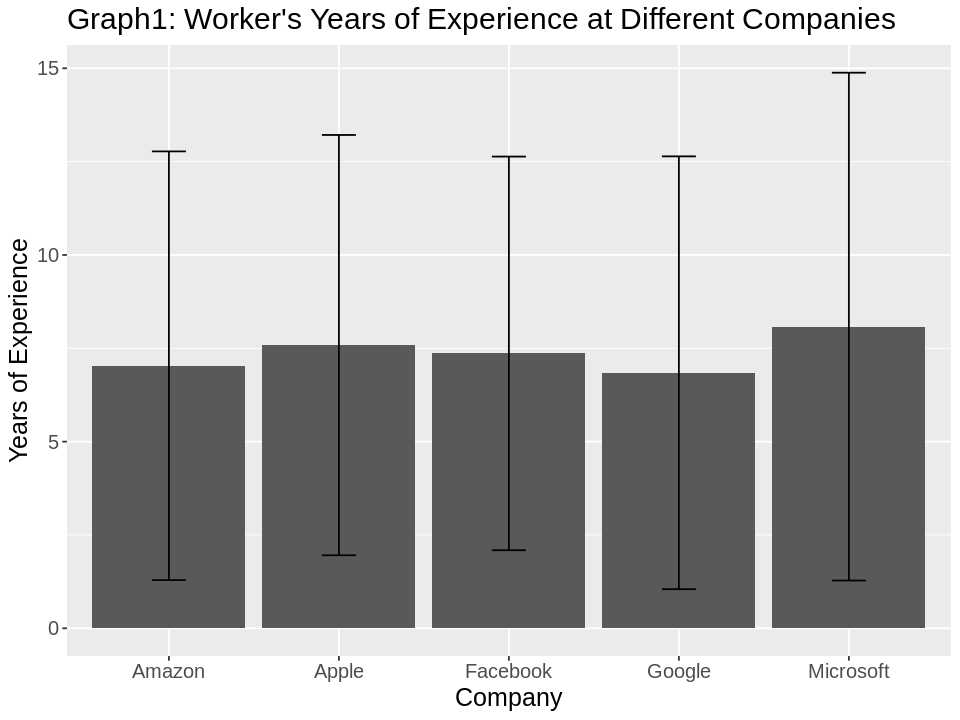

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)
data_for_vis_bar <- data_train |> group_by(company) |>
                summarize(mean_yoe=mean(yearsofexperience), sd_yoe=sd(yearsofexperience))
#data_for_vis_bar
yoe_vis_bar <-  data_for_vis_bar |>
                ggplot(aes(x=company, y=mean_yoe)) +
                geom_bar(stat="identity") +
                geom_errorbar(aes(x=company, ymin=mean_yoe-sd_yoe,ymax=mean_yoe+sd_yoe, width=.2)) +
                labs(title="Graph1: Worker's Years of Experience at Different Companies", x="Company", y="Years of Experience") +
                theme(text = element_text(size=15)) 
yoe_vis_bar

The graph titled "Graph1: Worker's Years of Experience at Different Companies" visualizes the mean years of experience of workers at different companies. Each bar in the graph corresponds to a specific company and the height of the bar indicates the mean years of experience of workers at that company. Additionally, error bars are plotted for each bar to show the range of variability in the data. We can see that the average working experience (years) of employees in different companies is not much different, and the maximum value is almost the same, Only Microsoft has higher average and maximum values than other companies, while the rest are nothing special, so we speculate that work experience may not be a good predictor of companies.

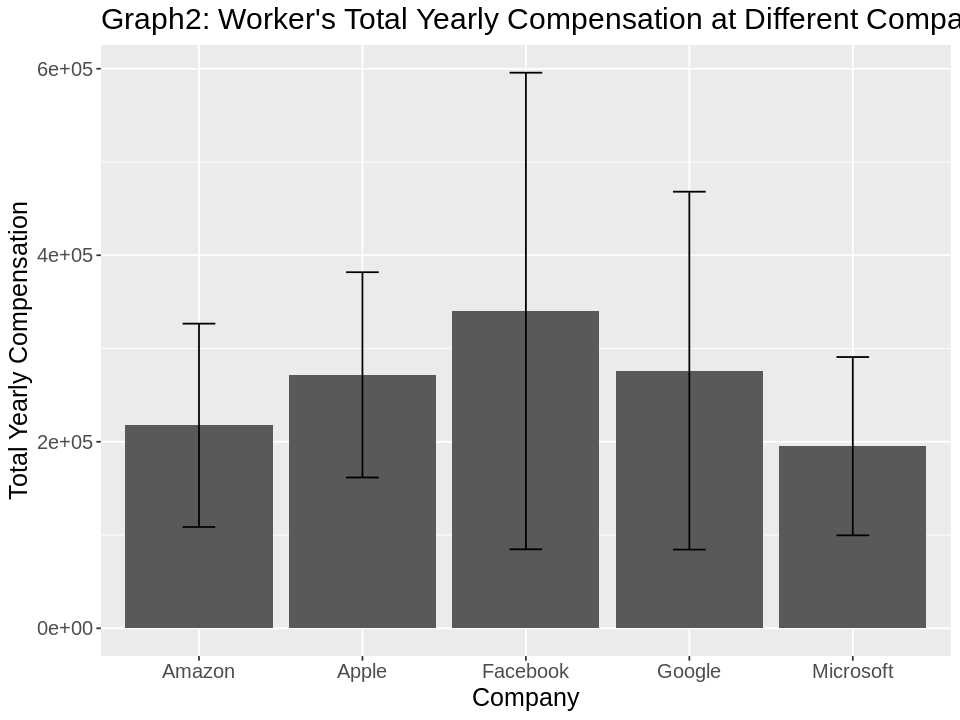

In [11]:
options(repr.plot.width = 8, repr.plot.height = 6)
data_for_vis_tyc <- data_train |> group_by(company) |>
                summarize(mean_tyc=mean(totalyearlycompensation), sd_tyc=sd(totalyearlycompensation))
#data_for_vis_tyc
tyc_vis_bar <-  data_for_vis_tyc |>
                ggplot(aes(x=company, y=mean_tyc)) +
                geom_bar(stat="identity") +
                geom_errorbar(aes(x=company, ymin=mean_tyc-sd_tyc,ymax=mean_tyc+sd_tyc, width=.2)) +
                labs(title="Graph2: Worker's Total Yearly Compensation at Different Companies", x="Company", y="Total Yearly Compensation") +
                theme(text = element_text(size=15)) 
tyc_vis_bar

The graph titled "Graph2: Total Annual Compensation of Workers in Different Companies" visualizes the Total Yearly Compensation (TYC) of employees in different companies. Each bar in the graph corresponds to a specific company, and the height of the bar represents the average TYC of that company's employees. Additionally, error bars are plotted for each bar to show the variable range of the data. We can see that the salary gap of the five companies is relatively large, which is reflected not only in the average value but also in the range. Among them, Facebook has the highest average and upper limit, which is almost double that of Microsoft, which has the lowest value. There are also visible gaps among the rest of the companies. Therefore, we speculate that TYC may be the factor that leads to a higher accuracy rate.

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


company,Female,Male
<chr>,<int>,<int>
Amazon,318,1605
Apple,87,364
Facebook,154,603
Google,179,794
Microsoft,235,978


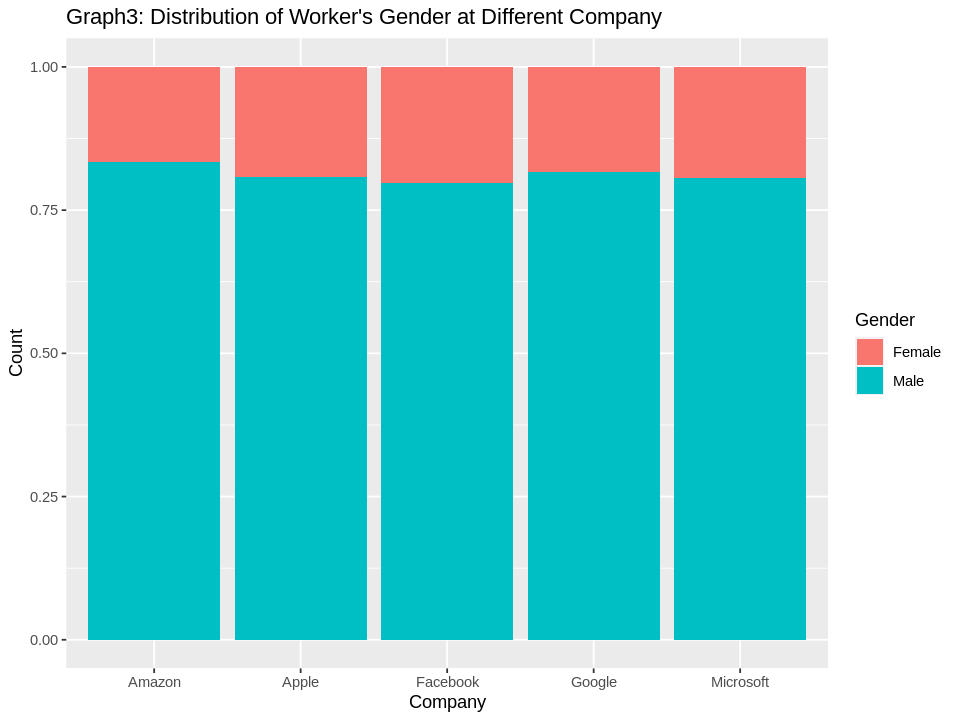

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)
data_for_vis_gen <- data_train |> group_by(company,gender) |>
                summarize(count=n())
#data_for_vis_gen
gen_vis_table <- data_for_vis_gen |> pivot_wider(names_from=gender,values_from=count)
gen_vis_table
gen_vis_bar <- ggplot(data_for_vis_gen, aes(x = company, y = count, fill = gender)) + 
                geom_bar(stat = "identity", position = "fill") + 
                labs(title="Graph3: Distribution of Worker's Gender at Different Company",x="Company", y="Count", fill = "Gender")
gen_vis_bar

The graph titled "Graph3: Distribution of Workers' Gender at Different Companies" visualizes the gender distribution of employees at different companies. Each bar in the chart corresponds to a specific company and is divided into two sections representing the proportion of male and female employees. The height of each section indicates the proportion of employees of that gender in the corresponding company. It can be seen from the figure that the ratio of male to female in the five companies is not much different, all around 80%, so we speculate that the accuracy of gender prediction will not be very high.

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


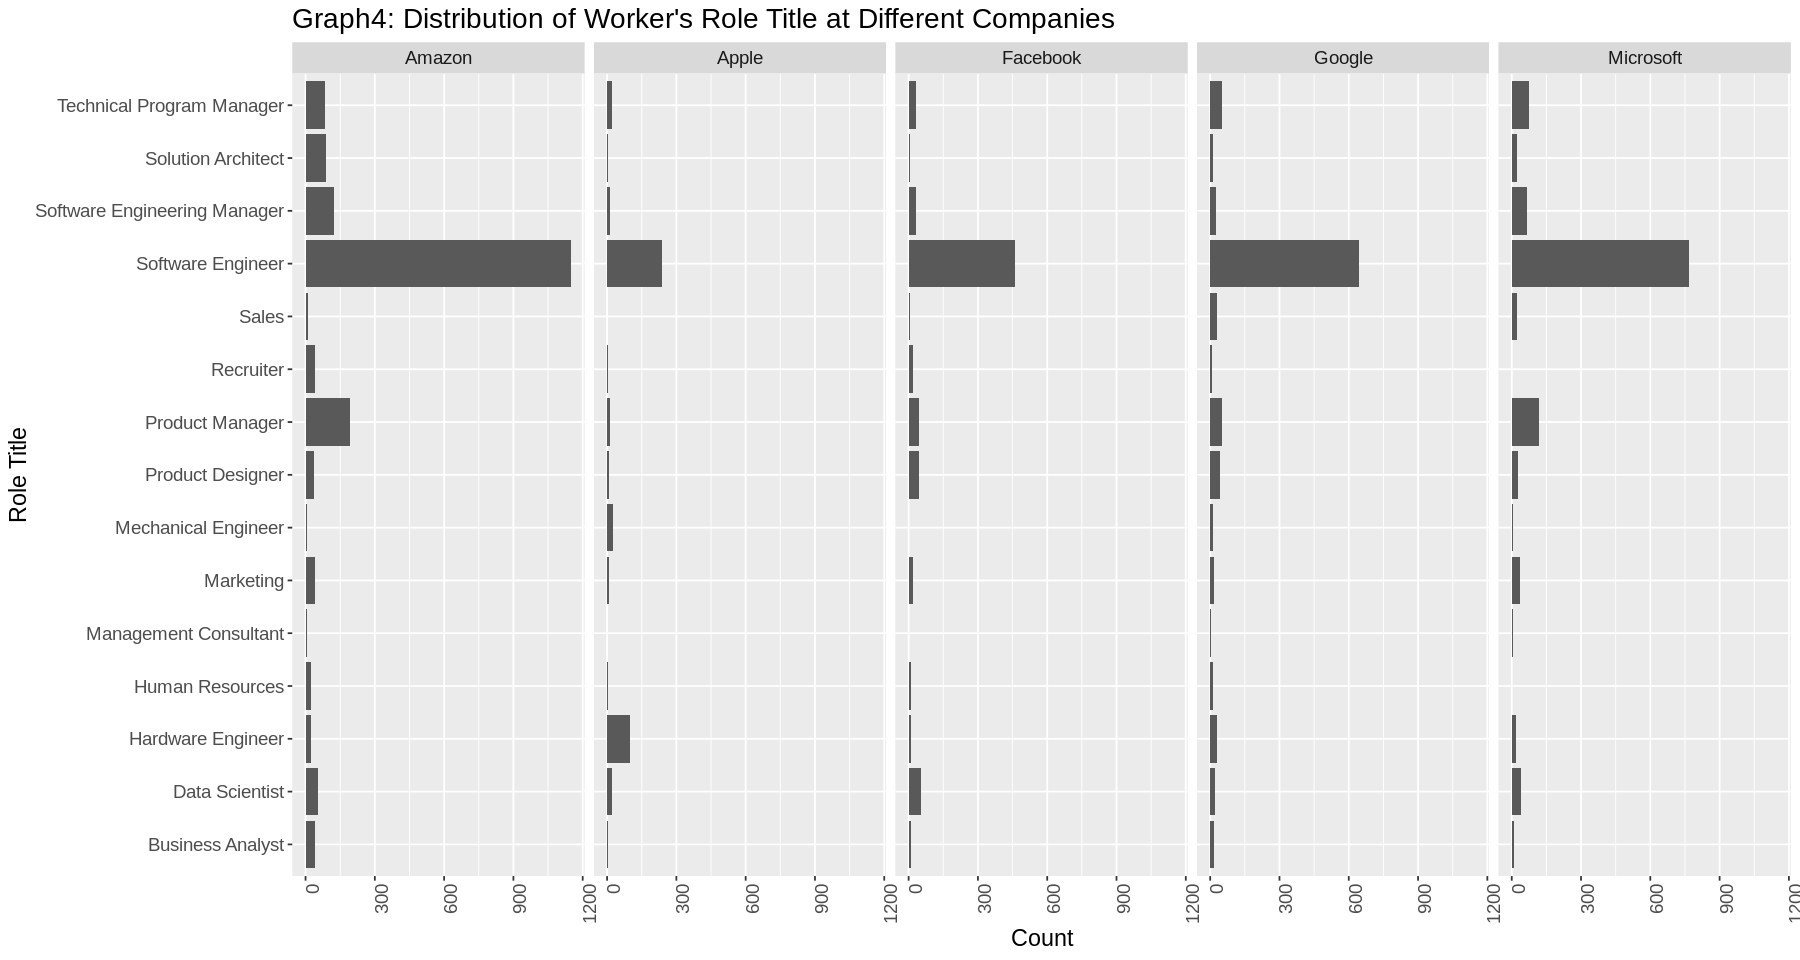

In [13]:
options(repr.plot.width = 15, repr.plot.height = 8)
data_for_vis_title <- data_train |> group_by(company, title) |> summarize(count=n())
title_vis_bar <- data_for_vis_title |>
    ggplot(aes(x = count, y = title)) + 
        geom_bar(stat="identity") +
        labs(x = "Count", y = "Role Title", title = "Graph4: Distribution of Worker's Role Title at Different Companies") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=14))
title_vis_bar

The graph titled "Graph4: Distribution of Workers' Role Title at Different Companies" visualizes the distribution of workers' roles across different companies. Each panel in the graph corresponds to a specific company, and the bars in each panel show the number of employees with different job titles. The length of each bar represents the number of workers with the corresponding job in the corresponding company. We can see that the largest number of employees in each company are software engineers, but there is a big gap in the number. And because the scale of the coordinate axis is large (300 per unit), it is difficult to say whether the position has a high prediction accuracy.

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


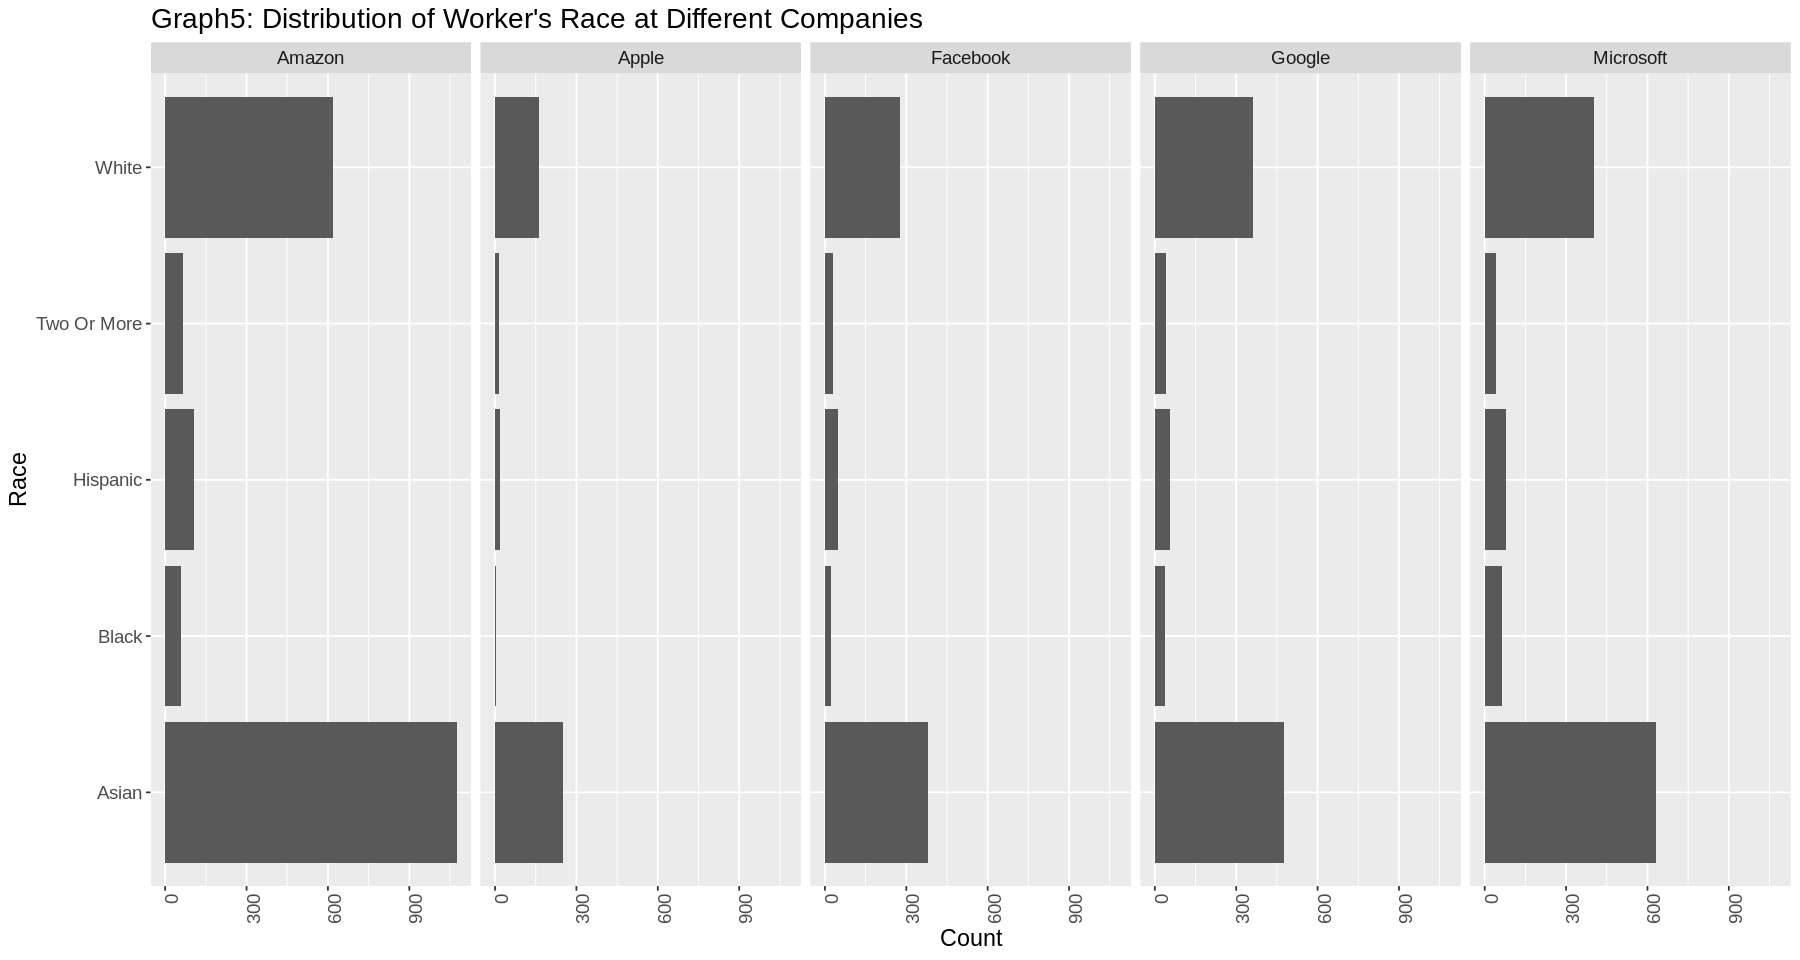

In [14]:
options(repr.plot.width = 15, repr.plot.height = 8)
data_for_vis_race <- data_train |> group_by(company, Race) |> summarize(count=n())
race_vis_bar <- data_for_vis_race |>
    ggplot(aes(x = count, y = Race)) + 
        geom_bar(stat="identity") +
        labs(x = "Count", y = "Race", title = "Graph5: Distribution of Worker's Race at Different Companies") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=14))
race_vis_bar

The graph titled "Graph5: Distribution of Workers' Race at Different Companies" visualizes the distribution of workers' race at different companies. Each panel in the graph corresponds to a particular company, and the bars in each panel show the number of workers by race. The length of each bar represents the number of workers in the corresponding company with the corresponding race. It can be seen that Caucasians and Asians are the most in all five companies. But the proportions are also different. And because the scale of the coordinate axis is large (300 per unit), it is difficult to say whether the position has a high prediction accuracy.

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


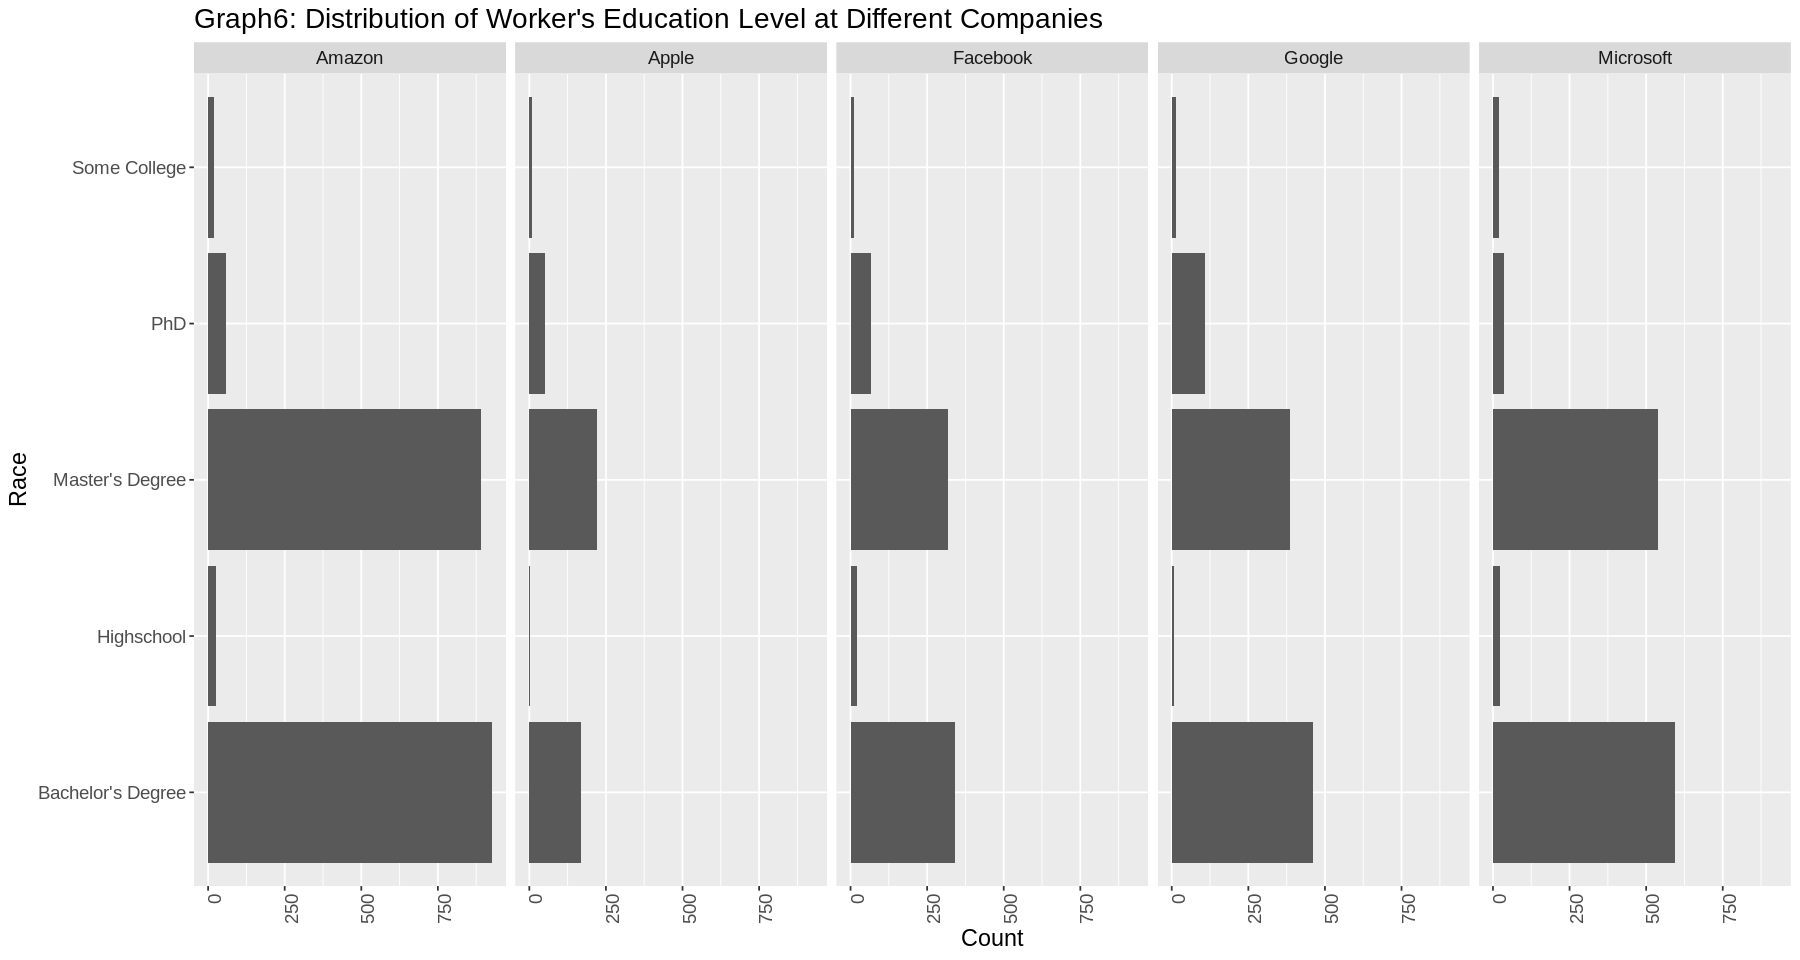

In [15]:
options(repr.plot.width = 15, repr.plot.height = 8)
data_for_vis_edu <- data_train |> group_by(company, Education) |> summarize(count=n())
edu_vis_bar <- data_for_vis_edu |>
    ggplot(aes(x = count, y = Education)) + 
        geom_bar(stat="identity") +
        labs(x = "Count", y = "Race", title = "Graph6: Distribution of Worker's Education Level at Different Companies") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=14))
edu_vis_bar

The graph titled "Graph6: Distribution of Workers' Educational Levels by Firms" visualizes the distribution of workers' educational levels by firms. Each panel in the graph corresponds to a specific company, and the bars in each panel show the number of workers with different levels of education. The length of each bar represents the number of workers in the corresponding company with the corresponding education level. It can be seen that Bachelor's Degree and Master's Degree are the most in all five companies. But the proportions are also different. And because the scale of the coordinate axis is large (250 per unit), it is difficult to say whether the position has a high prediction accuracy.

### Data Analysis
Before we start working on the classification process, we have to prepare our total dataset, `tidy_salary_data`. This is because both mof the training and testing dataset have to be readable by our classification model later on, hence we will adjust our dataset so it is ready to be used as the classification model.

Since we are going to use `company` as the class and the other columns as the predictors, there are a few things we need to do. 
- Since we are going to use `gender`, `title`, `Race`, and `Education` as predictors, and since they are in characters, we cannot use them in the classification model, therefore we have to change them to numerical characters. One way to change them is into binary columns consisted of 0 and 1. We can do this by mutating each of the values manually as follows. Keep in mind that we acknowledge different genders, and the binarification of gender in this project is for the purpose of simplification. 
- Then, we remove the original columns of `title`, `Race`, and `Education` since we do not need them anymore for the classification, all the information is already mutated to the additional columns.
- Finally, we mutate the class we are going to predict, `company` as a factor.

In [16]:
# To help with the binarification
# unique(tidy_salary_data$title)
# unique(tidy_salary_data$Race)
# unique(tidy_salary_data$Education)

ready_salary_data <- tidy_salary_data |>
                    # binarification of genders
                    mutate(gender=ifelse (gender == "Male",1,0)) |> 

                    # binarification of each role titles, each column will represent their title
                    mutate(SE=ifelse(title=="Software Engineer",1,0)) |> 
                    mutate(SA=ifelse(title=="Solution Architect",1,0)) |>
                    mutate(SEM=ifelse(title=="Software Engineering Manager",1,0)) |>
                    mutate(TPM=ifelse(title=="Technical Program Manager",1,0)) |>
                    mutate(S=ifelse(title=="Sales",1,0)) |>
                    mutate(R=ifelse(title=="Recruiter",1,0)) |>
                    mutate(PM=ifelse(title=="Product Manager",1,0)) |>
                    mutate(PD=ifelse(title=="Product Designer",1,0)) |>
                    mutate(ME=ifelse(title=="Mechanical Engineer",1,0)) |>
                    mutate(M=ifelse(title=="Marketing",1,0)) |>
                    mutate(MC=ifelse(title=="Management Consultant",1,0)) |>
                    mutate(HR=ifelse(title=="Human Resources",1,0)) |>
                    mutate(HE=ifelse(title=="Hardware Engineer",1,0)) |>
                    mutate(DS=ifelse(title=="Data Scientist",1,0)) |>
                    mutate(BA=ifelse(title=="Business Analyst",1,0)) |>

                    # binarification of Race
                    mutate(asian=ifelse(Race=="Asian",1,0)) |>
                    mutate(twoormore=ifelse(Race=="Two Or More",1,0)) |>
                    mutate(hispanic=ifelse(Race=="Hispanic",1,0)) |>
                    mutate(white=ifelse(Race=="White",1,0)) |>
                    mutate(black=ifelse(Race=="Black",1,0)) |>

                    #binarification of Education
                    mutate(PhD=ifelse(Education=="PhD",1,0)) |>
                    mutate(master=ifelse(Education=="Master\'s Degree",1,0)) |>
                    mutate(bachelor=ifelse(Education=="Bachelor\'s Degree",1,0)) |>
                    mutate(highschool=ifelse(Education=="Highschool",1,0)) |>
                    mutate(somecollege=ifelse(Education=="Some College",1,0)) |>

                    # removal of the original columns
                    select(-title, -Race, -Education) |>

                    # as factor
                    mutate(company=as.factor(company))

ready_salary_data

company,yearsofexperience,totalyearlycompensation,gender,SE,SA,SEM,TPM,S,R,⋯,asian,twoormore,hispanic,white,black,PhD,master,bachelor,highschool,somecollege
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Google,5,400000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,0
Microsoft,3,136000,1,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
Google,6,337000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Google,20,4500000,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,0
Facebook,22,2372000,1,0,0,1,0,0,0,⋯,0,0,0,0,1,0,1,0,0,0
Facebook,17,4980000,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,0


The reason of this way of binarification is because we cannot use number to represents unrelated categorical variables. For instance, mapping Software Engineering to 0, Product Manager to 1, and so on until Sales to 15, is an incorrect way of mapping categorical variables into numerical variables. This is because Product Manager does not neccessarily means it is closer to Software Engineering than to Sales. This can create problems later on our classification model, therefore, we are using this binarification method.

Now, after we have done the wrangling, our data is ready for the classification process. We are going to re-split the data with the same seed, so we have the exact same data we used before.

In [17]:
set.seed(2023)
salary_split <- initial_split(ready_salary_data, prop = 0.75, strata = company)  
salary_train <- training(salary_split)   
salary_test <- testing(salary_split)
salary_train
salary_test

company,yearsofexperience,totalyearlycompensation,gender,SE,SA,SEM,TPM,S,R,⋯,asian,twoormore,hispanic,white,black,PhD,master,bachelor,highschool,somecollege
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Amazon,15,310000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
Amazon,19,620000,1,0,0,1,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
Amazon,4,210000,1,1,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Microsoft,17,337000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,0
Microsoft,1,177000,1,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
Microsoft,10,87000,1,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0


company,yearsofexperience,totalyearlycompensation,gender,SE,SA,SEM,TPM,S,R,⋯,asian,twoormore,hispanic,white,black,PhD,master,bachelor,highschool,somecollege
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Google,6,337000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
Microsoft,4,222000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,0
Apple,1,180000,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Microsoft,13,187000,0,0,0,0,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0
Microsoft,15,192000,1,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
Facebook,2,233000,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0


Now, we can start entering our first part of the classification. Our goal so far here is to find an approximate of the accuracy of the classification model for our dataset, assuming all the predictors are relevant and contributes to our prediction class.

Since we are using k-nn classification, we are firstly going to find the optimal numbers of neighbors, with the following steps:
- We will create a recipe that uses all predictors and a model specification with tuning on the number of neighbours
- We then perform a 3-fold cross-validation on the training set
- Next, we create a workflow analysis with our recipe and model specification.
- Lastly, collect the metrics from the workflow analysis and plot the accuracy of each *k* numbers of neighbors

In [18]:
top_5_company_count

company,count
<chr>,<int>
Amazon,2576
Microsoft,1612
Google,1306
Facebook,999
Apple,599


- Creating a recipe

Since k-nn classification uses euclidean distance to measure the distance of each neighbors, we need to scale the data considering some predictors such as `totalyearlycompensation` is obviously bigger and not in ratio with the binary predictors, `gender`, `asian`, etc. We also need to upsample the class, which is company, since as we see above, `top_5_company_count`, the companies are not balanced, which can lead to some majority classes chosen in favor if the k-nn algorithm. We can use this upsample method from package `themis`, which has been installed in the beginning.

In [19]:
salary_recipe <- recipe(company ~., data = salary_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
salary_recipe_upsampled <- salary_recipe |> 
                        step_upsample(company, over_ratio = 1)

- Performing 3-fold cross-validation

We can slowly do this with `vfold_cv()`. Note that here since it is taking so long to perform a 5-fold cross-validation, we will use 3-fold cross-validation instead.

In [20]:
set.seed(2023)
salary_vfold <- vfold_cv(salary_train, v = 3, strata = company)

- Creating workflow analysis

We are going to make the classification model which accepts tune classifier, then we can put the recipe and model into a workflow, which we can resample using the cross-validation using *k* values 20, 40, 60, ... , 200, as follows. Note that the following cell takes time about 10 minutes to run, hence might cause some error when graded with the default autotester used for the worksheets and tutorials in class.

In [43]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
k_values <- tibble(neighbors = seq(20,200,20))
knn_workflow <- workflow() |>
      add_recipe(salary_recipe_upsampled) |>
      add_model(knn_tune) |>
      tune_grid(resamples = salary_vfold, grid = k_values)

- Now we plot the accuracies of using each `k` neighbors

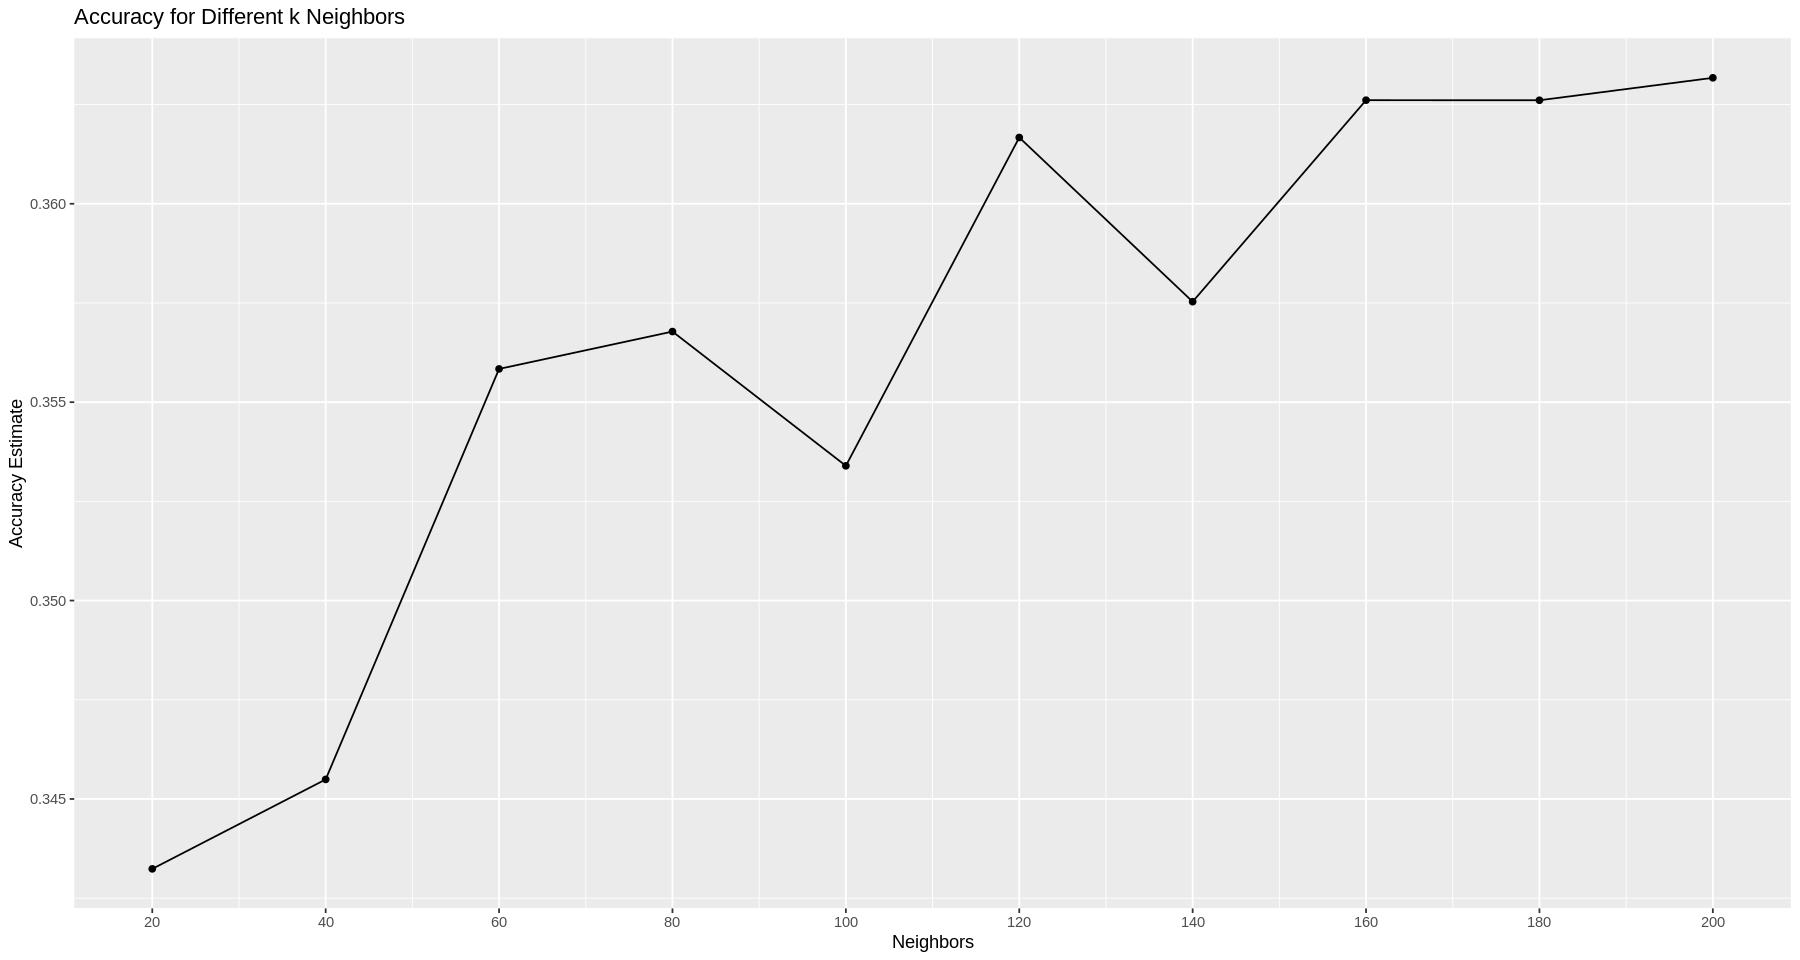

In [41]:
accuracies <- knn_workflow |> collect_metrics() |> filter(.metric == "accuracy")
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(title= "Accuracy for Different k Neighbors", x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(20, 200, by = 20))  # adjusting the x-axis
#+       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot

As we can see in the plot above, the *k* number of neighbors which yield the highest possible accuracy out of all cross validation is about 200. Hence, we are going to use 200 as the number of neighbors in our classification model. 

It is important to note here, that the accuracy estimate for the cross-validation is very low, sitting at maximum 0.364 or 36.4%. This might be because of the very rough distribution of all the predictors making the company prediction quite unreliable. 

After getting the optimal number of neighbors yielding the highest accuracy, we can finally go into the second part of the classification, building our model and fitting them to the training data set, `salary_train`, as follows:

In [44]:
#2 Upsampled salary training data, having the same number of observations for each class
balanced_salary_train <- salary_recipe_upsampled |> prep() |> bake(salary_train)
balanced_salary_train_companies <- balanced_salary_train |> group_by(company) |> summarize(count=n())

#2 New recipe made from just the upsampled salary training data
balanced_salary_recipe <- recipe(company ~., data = balanced_salary_train) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

# Model for calculating k-nn classification algorithm
salary_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 200) |>
      set_engine('kknn') |>
      set_mode("classification")

#2 Workflow fit made from the balanced recipe and balanced training data
balanced_salary_fit <- workflow() |>
      add_recipe(balanced_salary_recipe) |>
      add_model(salary_spec) |>
      fit(data = balanced_salary_train)

#1 Usual workflow with training data and imbalanced data
salary_fit <- workflow() |>
      add_recipe(salary_recipe) |>
      add_model(salary_spec) |>
      fit(data = salary_train)

In [40]:
#1 prediction using the usual fit without balancing
salary_predictions <- predict(salary_fit, salary_test) |> bind_cols(salary_test)
salary_metrics <- salary_predictions |>
                 metrics(truth = company, estimate = .pred_class)
salary_conf_mat <- salary_predictions |> 
      conf_mat(truth = company, estimate = .pred_class)
salary_metrics
salary_conf_mat

#2 prediction using the upsampled fit
balanced_salary_predictions <- predict(balanced_salary_fit, salary_test) |> bind_cols(salary_test)
balanced_salary_metrics <- balanced_salary_predictions |>
                 metrics(truth = company, estimate = .pred_class)
balanced_salary_conf_mat <- balanced_salary_predictions |> 
      conf_mat(truth = company, estimate = .pred_class)
balanced_salary_metrics
balanced_salary_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4033803
kap,multiclass,0.0987947


           Truth
Prediction  Amazon Apple Facebook Google Microsoft
  Amazon       605    96      197    276       335
  Apple          5    31        4      2        10
  Facebook       6     5       18     13         4
  Google        21    10       20     29        17
  Microsoft     16     6        3     13        33

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.136338
kap,multiclass,0.000000


           Truth
Prediction  Amazon Apple Facebook Google Microsoft
  Amazon         0     0        0      0         0
  Apple          0     0        0      0         0
  Facebook     653   148      242    333       399
  Google         0     0        0      0         0
  Microsoft      0     0        0      0         0

As we see from above, we used two different methods for the predictions:
- Firstly, as marked by #1, we make the prediction using the workflow fit made from the recipe without balancing or upsampling the data. The accuracy we get from this prediction is about 40.3%, which is quite small, because we only use the same imbalanced data to predict the class.
- The next prediction method, as marked by #2, we get using workflow fit made from the recipe with balancing loaded with the upsampled, balanced data. Strangely, no matter what number of neighbors *k* we put inside our spec model, it kept on predicting the same class over and over. 
Hence, a question emerges, does this mean we cannot use upsample in predicting the classes?

Considering how we got here so far, considering how we see the visualizations of the variable distribution per class above, we do not intend to answer this question, since it is likely that the model will not predict correctly most of the time because the variables are very weakly related to the prediction class itself. 

Hence, from here, should we just take the accuracy of the model we have just made, using 5-fold cross-validations' recommended k-value for dealing with balanced data to determine the most optimal k-value in our model which have the imbalanced training data fitted in?

It does not sound right. We are going to find out in case that we can pull some conclusions through here. This time, we are using 5-fold cross-validations' recommended k-value for dealing with imbalanced data instead, and we will compare the accuracy of this new model to the previous one. Again, the following cell run for about 10 minutes.

In [36]:
k_values_2 <- tibble(neighbors = seq(5,90,5))
knn_workflow_2 <- workflow() |>
      add_recipe(salary_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = salary_vfold, grid = k_values_2)

It is important to note, after further testing, we don't need more than 90 neighbors to see the peak, which is the optimized k value.

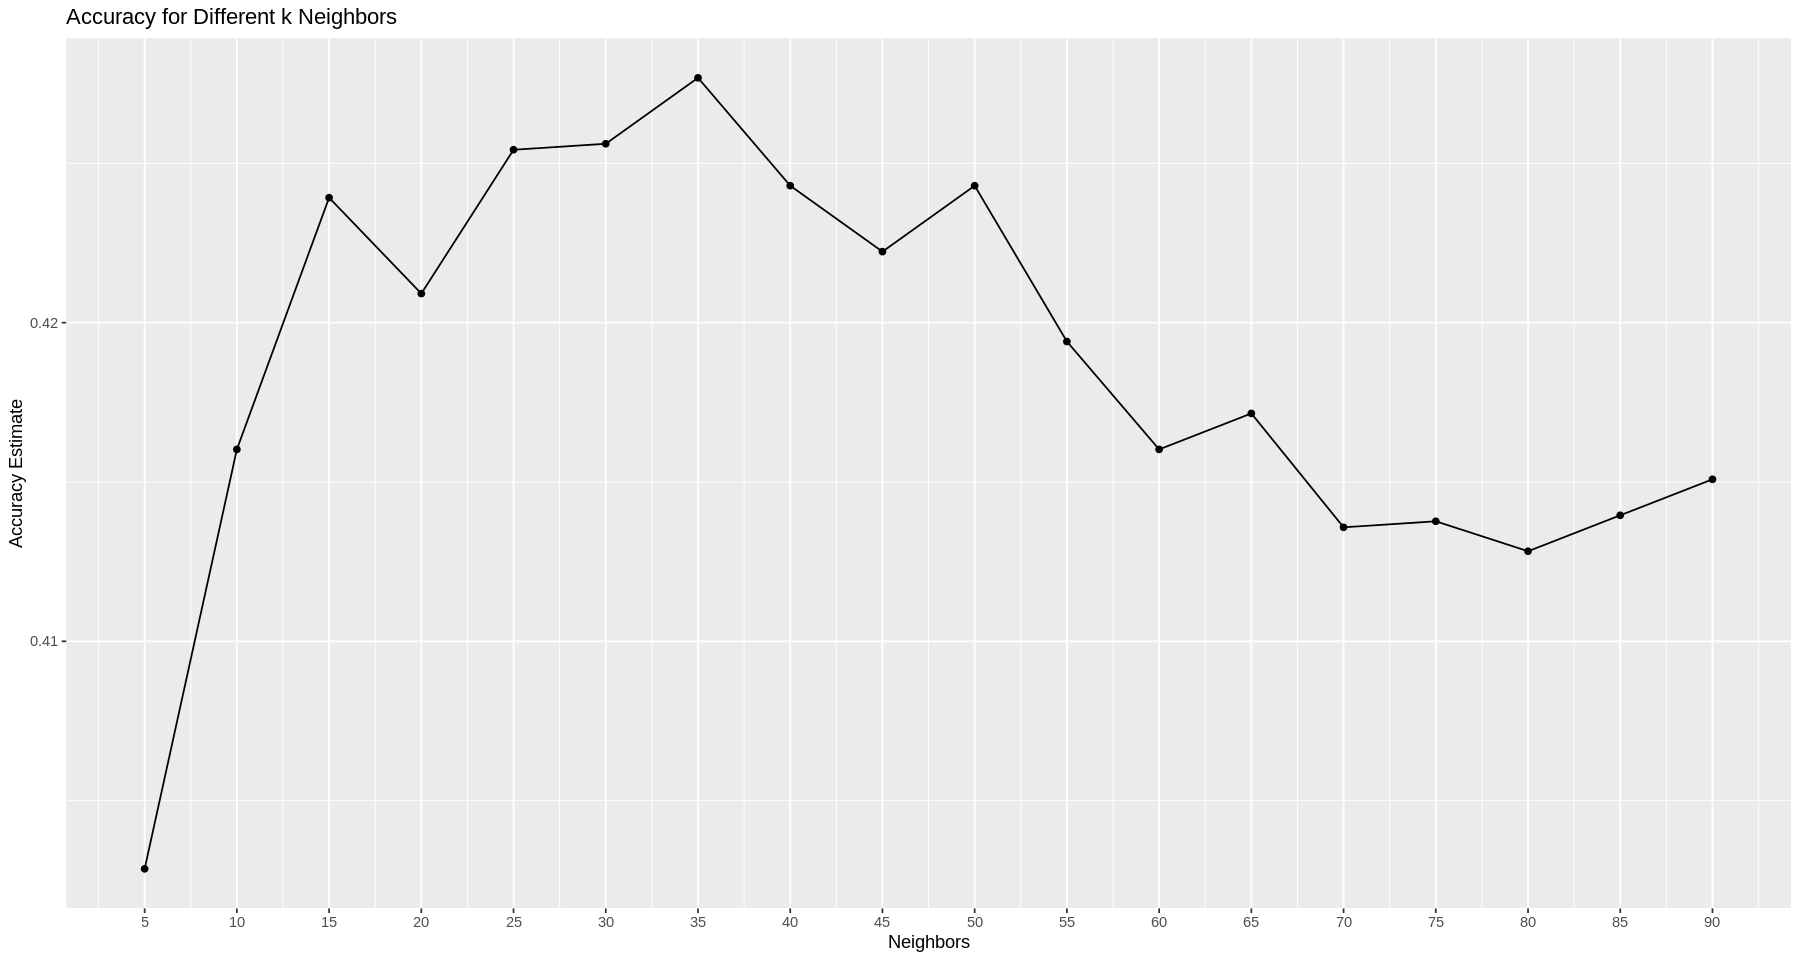

In [37]:
accuracies_2 <- knn_workflow_2 |> collect_metrics() |> filter(.metric == "accuracy")
cross_val_plot_2 <- ggplot(accuracies_2, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(title= "Accuracy for Different k Neighbors", x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(5, 90, by = 5))
cross_val_plot_2

In [26]:
salary_spec_2 <- nearest_neighbor(weight_func = 'rectangular', neighbors = 35) |>
      set_engine('kknn') |>
      set_mode("classification")
salary_fit_2 <- workflow() |>
      add_recipe(salary_recipe) |>
      add_model(salary_spec_2) |>
      fit(data = salary_train)
salary_predictions_2 <- predict(salary_fit_2, salary_test) |> bind_cols(salary_test)
salary_metrics_2 <- salary_predictions_2 |>
                 metrics(truth = company, estimate = .pred_class)
salary_conf_mat_2 <- salary_predictions_2 |> 
      conf_mat(truth = company, estimate = .pred_class)
salary_metrics_2
salary_conf_mat_2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4338028
kap,multiclass,0.2021583


           Truth
Prediction  Amazon Apple Facebook Google Microsoft
  Amazon       470    59      105    173       221
  Apple          9    38        6      9        13
  Facebook      20    12       57     27        13
  Google        67    22       45     77        24
  Microsoft     87    17       29     47       128

From here, if we just use the usual data without any balancing, we improve to about 43.3% instead of 40.3% accuracy. This is because of how we eventually fitted the model on an imbalanced data, it is better to use the recommended neighbors from cross-validation of the imbalanced data instead of the one from cross-validation of the balanced data.

Nevertheless, 43.3% accuracy is still low because the majority classifier, Amazon, is in the lead for about 36.3% as shown below.

In [27]:
amazon_count <- slice(top_5_company_count, 1) |> pull(count)
total_sum <- top_5_company_count |> summarize(total=sum(count))
ratio <- amazon_count / pull(total_sum)
ratio

[1] 0.3632262

This is very sad because in the end, we only managed get 7% accuracy above the majority classifier, which is really bad for a classification model, not enough to be considered "working". There might be many reason for this:
- The data is imbalanced, hence some classes are predicted more often than another, causing a lot of "misses" in the prediction
- The predictors are very weakly affecting the prediction, hence there is no actual relationship between the predictors and the class, company. This could happen if the distribution of each predictors for each class is very similar, causing the model to incorrectly predict the test cases. This will make the predictors become no longer relevant in predicting the class.

Notice that these factors are the weaknesses of the *k*-nn classification, since the classes are imbalanced and there might be a lot of irrelevant predictors in predicting the company, weakening the accuracy of classification of this algorithm.

After this model failure of predicting the company correctly, we are going to assume that there are some irrelevant predictors we do not need in our dataset.
With that being said, we will be trying to address the second problem above, by doing forward selection to answer our original question.

Here is how the forward selection works in order to determine which predictors, if any, works with the highest accuracy among all of the predictors:
- For every size from 1 to some number of predictors, the model will perform all steps we have done so far in calculating the accuracy. This includes making recipe, performing cross-validation which test the model's accuracy for neighbor of what we picked above, which is 35 neighbors. Note that usually in forward selection we tune the neighbors, for each of the k value, which will be really time consuming (as experimented for 6 hours of trial and error), hence we are trying to simplify to make this program run. Then, it will pick the most optimal accuracy from all of them, and then store it in one row of a table we made. This is repeated for the first predictor, and then the first and second predictor, and then the first and second and the third predictor, all the way to the last predictor we have, which is the last iterator will run the step we have just made above. 
However, in addition to these steps, we will only run some predictors at a time. So in the following, these are the set of predictors we are going to run:
    - `totalyearlycompensation`, `gender`, `highschool`, `PhD`
    - `SE`,`SA`,`SEM`,`master`, `white`
    - `bachelor`, `hispanic`, `TPM`, `S`, and `R`
    - `PM`, `PD`, `ME`, `black`, `M`
    - `MC`, `HR`, `HE`, `twoormore`, `yearsofexperience`
    - `DS`, `BA`, `asian`,`somecollege`
- In each of the tables, we will see which combinations of predictors have the most accuracy of all by visualizing a line graph and identifying the elbow of the line graph for each number of predictors.

Note that for simplification purpose, we will not rename the variables name, so make sure to run these 6 blocks of code sequentially in order.

In [28]:
salary_train_simple <- salary_train |> select(company, totalyearlycompensation, gender, highschool, PhD)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# extracting column name from all but classes
names <- colnames(salary_train_simple |> select(-company))

# create a model specification
# we have created salary_spec for this above

# create a 5-fold cross-validation object
# we have created salary_vfold
simple_vfold <- vfold_cv(salary_train_simple, v = 3, strata = company)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("company", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        salary_running_recipe <- recipe(as.formula(model_string), 
                                data = salary_train_simple) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(salary_running_recipe) |>
          add_model(knn_tune) |>
          tune_grid(resamples = simple_vfold, grid = tibble(neighbors = c(35))) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,company ~ totalyearlycompensation,0.3738973
2,company ~ totalyearlycompensation+PhD,0.3831136
3,company ~ totalyearlycompensation+PhD+highschool,0.3814187
4,company ~ totalyearlycompensation+PhD+highschool+gender,0.3831121


As we can see, the most optimal predictor combination here which lead to increase are totalyearlycompensation and PhD education

In [ ]:
salary_train_simple <- salary_train |> select(company, SA, SE, SEM, master, white)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# extracting column name from all but classes
names <- colnames(salary_train_simple |> select(-company))

# create a model specification
# we have created salary_spec for this above

# create a 5-fold cross-validation object
# we have created salary_vfold
simple_vfold <- vfold_cv(salary_train_simple, v = 3, strata = company)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("company", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        salary_running_recipe <- recipe(as.formula(model_string), 
                                data = salary_train_simple) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(salary_running_recipe) |>
          add_model(knn_tune) |>
          tune_grid(resamples = simple_vfold, grid = tibble(neighbors = c(35))) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,company ~ SA,0.3616694
2,company ~ SA+SE,0.3616694
3,company ~ SA+SE+SEM,0.3616694
4,company ~ SA+SE+SEM+master,0.3616694
5,company ~ SA+SE+SEM+master+white,0.3616694


As we can see, none of this predictors actually increase prediction result since the accuracy are all the same accross predictors.

In [30]:
salary_train_simple <- salary_train |> select(company, bachelor, hispanic, TPM, S, R)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# extracting column name from all but classes
names <- colnames(salary_train_simple |> select(-company))

# create a model specification
# we have created salary_spec for this above

# create a 5-fold cross-validation object
# we have created salary_vfold
simple_vfold <- vfold_cv(salary_train_simple, v = 3, strata = company)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("company", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        salary_running_recipe <- recipe(as.formula(model_string), 
                                data = salary_train_simple) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(salary_running_recipe) |>
          add_model(knn_tune) |>
          tune_grid(resamples = simple_vfold, grid = tibble(neighbors = c(35))) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,company ~ S,0.3646794
2,company ~ S+bachelor,0.3648674
3,company ~ S+bachelor+TPM,0.3648674
4,company ~ S+bachelor+TPM+R,0.3648674
5,company ~ S+bachelor+TPM+R+hispanic,0.3641153


As we can see, none of this predictors actually increase prediction result since the accuracy are all the same or decreasing (for 5 particularly) accross predictors.

In [31]:
salary_train_simple <- salary_train |> select(company, PM, PD, ME, black, M)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# extracting column name from all but classes
names <- colnames(salary_train_simple |> select(-company))

# create a model specification
# we have created salary_spec for this above

# create a 5-fold cross-validation object
# we have created salary_vfold
simple_vfold <- vfold_cv(salary_train_simple, v = 3, strata = company)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("company", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        salary_running_recipe <- recipe(as.formula(model_string), 
                                data = salary_train_simple) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(salary_running_recipe) |>
          add_model(knn_tune) |>
          tune_grid(resamples = simple_vfold, grid = tibble(neighbors = c(35))) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,company ~ ME,0.3650561
2,company ~ ME+PM,0.3650561
3,company ~ ME+PM+PD,0.3650561
4,company ~ ME+PM+PD+black,0.3650561
5,company ~ ME+PM+PD+black+M,0.3650561


As we can see, none of this predictors actually increase prediction result since the accuracy are all the same accross predictors.

In [32]:
salary_train_simple <- salary_train |> select(company, MC, HR, HE, twoormore, yearsofexperience)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# extracting column name from all but classes
names <- colnames(salary_train_simple |> select(-company))

# create a model specification
# we have created salary_spec for this above

# create a 5-fold cross-validation object
# we have created salary_vfold
simple_vfold <- vfold_cv(salary_train_simple, v =3, strata = company)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("company", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        salary_running_recipe <- recipe(as.formula(model_string), 
                                data = salary_train_simple) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(salary_running_recipe) |>
          add_model(knn_tune) |>
          tune_grid(resamples = simple_vfold, grid = tibble(neighbors = c(35))) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,company ~ HE,0.3718236
2,company ~ HE+yearsofexperience,0.3787843
3,company ~ HE+yearsofexperience+HR,0.3795362
4,company ~ HE+yearsofexperience+HR+MC,0.3801002
5,company ~ HE+yearsofexperience+HR+MC+twoormore,0.3797243


As we can see, the most optimal predictor combination here which lead to increase are the role HE, HR, MC, and years of experience.

In [33]:
salary_train_simple <- salary_train |> select(company, DS, BA, asian, somecollege)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# extracting column name from all but classes
names <- colnames(salary_train_simple |> select(-company))

# create a model specification
# we have created salary_spec for this above

# create a 5-fold cross-validation object
# we have created salary_vfold
simple_vfold <- vfold_cv(salary_train_simple, v = 3, strata = company)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("company", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        salary_running_recipe <- recipe(as.formula(model_string), 
                                data = salary_train_simple) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(salary_running_recipe) |>
          add_model(knn_tune) |>
          tune_grid(resamples = simple_vfold, grid = tibble(neighbors = c(35))) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,company ~ DS,0.3616702
2,company ~ DS+BA,0.3616702
3,company ~ DS+BA+somecollege,0.3616702
4,company ~ DS+BA+somecollege+asian,0.3597896


As we can see, none of this predictors actually increase prediction result since the accuracy are all the same accross predictors.

Hence, combining this with everything, predictors with highest accuracy are HE, HR, MC, yearsofexperience, totalyearlycompensation, and PhD. 

Answering our initial question, the only relevant predictors are some title such as Hardware Engineer, Human Resources, and Management Consultant. Years of experience that a worker has also relevant to the company preference, with some company prefer workers with more experience than others. Companies also have significant difference in total yearly compensation or annual net salary for their workers. However, Race and Gender does not contribute much to the accuracy of the predictors. 

## Discussion

### Discussion

In this project, we expect to find the most relevant predictors that can affect the company you join because they can vary based on years of experience, gender, and expected salary. The result we found —— the combination of A and B has the highest accuracy rate for prediction is in line with our expectations at the beginning. The impact is impactful to the job market and the trajectory of the career path for the people who are currently searching for jobs and people who are interested in learning more about their career development. Those predictors can be something to consider when they are researching opportunities. However, as our dataset is not fully complete - some columns are hard-to-interpret and variables have a high percentage of N/A, it will be helpful to refresh the survey in the near future to get more information. This can provide us with a clear understanding and strengthen the correlation of the variables. Hence, future questions for us might be on how other factors (location, job title, and university they graduated from) can affect the company workers should choose to work.

### Reference

[1] Ogozaly, Jack. “Data Science and STEM Salaries.” Kaggle, 10 Oct. 2021, https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries. 